# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">
<b> Comentário geral: </b> <a class="tocSkip"></a>

Oi, Desejado! **Parabéns pela conclusão do projeto!** 🎉🥳 O seu trabalho já demonstra excelente qualidade.Como comentários positivos, destaco: 
    
- Código bem estruturado e comentado: A organização do código é excelente, com comentários claros em cada etapa, facilitando a compreensão. O uso de emojis e markdown agrega ainda mais clareza e torna a leitura do código muito mais fluida e agradável.

- Análise crítica de dados de alto nível: Os comentários detalhados em cada fase e a conclusão revelam uma análise crítica aprofundada, demonstrando grande domínio da interpretação e avaliação dos dados.
    
    
Para prosseguirmos com a aprovação, **necessitamos de ajustes nas métricas de  `taxa de retenção em coortes`, `LTV`, `CAC` e `ROI`**. 

Deixo abaixo as etapas que você precisa executar para calcular essas métricas. O dataframe gerado ao final pode ser usado para as duas tarefas.

<br> 
   
    
**1. Calcule o primeiro pedido de cada usuário e extraia o mês.** - 
```python
first_orders_df = orders_df.groupby("..").agg({"Buy Ts": "min"}).reset_index().rename(columns={"Buy Ts": "first_purchase"})
first_orders_df['first_purchase_month'] = first_orders_df['first_purchase'].dt.to_period("M")
```

**2. Faça o merge entre o primeiro pedido e os dados de source pelo `ID`.**
```pyhton
user_source = visits_df[['..', 'Source Id']].drop_duplicates()
first_orders_df = pd.merge(first_orders_df, user_source, on= '..')
```

**3. Calcule a receita mensal e faça o merge com a tabela criada anteriormente.**
```python
revenue_df = orders_df.groupby(['Uid', 'month']).agg({'Revenue': 'sum'}).reset_index()
buyers = first_orders_df.merge(revenue_df, on='Uid')
```

**4. Calcule a receita e os custos.**
```python
revenue_grouped_df = buyers.groupby(['..', 'month']).agg({'Revenue': 'sum'}).reset_index()
costs_grouped_df = costs_df.groupby(['..','month']).agg({'costs': 'sum'})
```
    
**5. Por fim, gere um dataframe por `source` e `month` com os dados de receita e custo.**
    
    
```python
report = pd.merge(
    costs_grouped_df, 
    revenue_grouped_df, 
    left_on=['...','month'], 
    right_on=['...', 'month']
)
```

O dataframe resultante dessas etapas é mostrado abaixo. Com esses dados, você consegue criar as métricas e executar as etapas restantes do seu projeto.
```
      costs	month	Source Id	Revenue
0	1125.61	2017-06	  1	     2563.84
1	1072.88	2017-07	  1	     3947.25
2	951.81	2017-08	   1	     3325.64
3	1502.01	2017-09	  1	     8193.42
4	2315.75	2017-10	  1	     11466.14
```
Os gabaritos de taxa de retenção, LTV e ROI devem ser semelhantes a esses: 
![image-3.png](attachment:image-3.png)
    
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
    
Boa sorte!😊
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral V2: </b> <a class="tocSkip"></a>
    
    
Oi Desejado! Tudo bom? 

Ainda precisamos realizar a analise por coortes. Você precisa de alguma ajuda em específico? Estou aqui para te ajudar 😁

<div class="alert alert-block alert-success">
<b> Comentário geral v3: </b> <a class="tocSkip"></a>
    
Muuuito obrigada pelos ajustes! O projeto esta aprovado! 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuração de estilo para os gráficos
sns.set(style='whitegrid')

In [4]:

# Definir os caminhos dos arquivos
visits_path = "/datasets/visits_log_us.csv"
orders_path = "/datasets/orders_log_us.csv"
costs_path = "/datasets/costs_us.csv"

# Carregar os dados
visits_df = pd.read_csv(visits_path)
orders_df = pd.read_csv(orders_path)
costs_df = pd.read_csv(costs_path)

# Exibir informações básicas dos datasets
visits_info = visits_df.info()
orders_info = orders_df.info()
costs_info = costs_df.info()

# Exibir amostras dos datasets
visits_head = visits_df.head()
orders_head = orders_df.head()
costs_head = costs_df.head()

(visits_info, orders_info, costs_info, visits_head, orders_head, costs_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

(None,
 None,
 None,
     Device               End Ts  Source Id             Start Ts  \
 0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
 1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
 2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
 3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
 4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
 
                     Uid  
 0  16879256277535980062  
 1    104060357244891740  
 2   7459035603376831527  
 3  16174680259334210214  
 4   9969694820036681168  ,
                 Buy Ts  Revenue                   Uid
 0  2017-06-01 00:10:00    17.00  10329302124590727494
 1  2017-06-01 00:25:00     0.55  11627257723692907447
 2  2017-06-01 00:27:00     0.37  17903680561304213844
 3  2017-06-01 00:29:00     0.55  16109239769442553005
 4  2017-06-01 07:58:00     0.37  14200605875248379450,
    source_id          dt  costs
 0          1  2017-06-01  75.20
 1       

In [5]:
# Ajustes nos dataframes

# Renomear colunas para manter consistência
visits_df.rename(columns={"Source Id": "source_id", "Start Ts": "start_ts", "End Ts": "end_ts"}, inplace=True)
orders_df.rename(columns={"Buy Ts": "buy_ts"}, inplace=True)
costs_df.rename(columns={"dt": "date"}, inplace=True)

# Converter colunas de data e hora para datetime
visits_df["start_ts"] = pd.to_datetime(visits_df["start_ts"])
visits_df["end_ts"] = pd.to_datetime(visits_df["end_ts"])
orders_df["buy_ts"] = pd.to_datetime(orders_df["buy_ts"])
costs_df["date"] = pd.to_datetime(costs_df["date"])

# Verificar duplicatas
visits_duplicates = visits_df.duplicated().sum()
orders_duplicates = orders_df.duplicated().sum()
costs_duplicates = costs_df.duplicated().sum()

# Exibir o número de duplicatas em cada dataset
(visits_duplicates, orders_duplicates, costs_duplicates)

(0, 0, 0)

In [6]:
# Verificar os tipos de dados após os ajustes
print(visits_df.dtypes)
print(orders_df.dtypes)
print(costs_df.dtypes)

# Verificar se há datas fora do intervalo esperado (jan/2017 - dez/2018)
print(visits_df["start_ts"].min(), visits_df["start_ts"].max())
print(orders_df["buy_ts"].min(), orders_df["buy_ts"].max())
print(costs_df["date"].min(), costs_df["date"].max())

Device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
Uid                  uint64
dtype: object
buy_ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object
source_id             int64
date         datetime64[ns]
costs               float64
dtype: object
2017-06-01 00:01:00 2018-05-31 23:59:00
2017-06-01 00:10:00 2018-06-01 00:02:00
2017-06-01 00:00:00 2018-05-31 00:00:00


In [7]:
# 1️⃣ Quantas pessoas usam o produto por dia, semana e mês?
visits_df["date"] = visits_df["start_ts"].dt.date  # Criar coluna apenas com a data

# Contar usuários únicos por dia, semana e mês
daily_users = visits_df.groupby("date")["Uid"].nunique()
weekly_users = visits_df.groupby(pd.to_datetime(visits_df["date"]).dt.to_period("W"))["Uid"].nunique()
monthly_users = visits_df.groupby(pd.to_datetime(visits_df["date"]).dt.to_period("M"))["Uid"].nunique()

# 2️⃣ Quantas sessões ocorrem por dia?
daily_sessions = visits_df.groupby("date")["Uid"].count()

# 3️⃣ Comprimento de cada sessão (diferença entre start_ts e end_ts)
visits_df["session_length"] = (visits_df["end_ts"] - visits_df["start_ts"]).dt.total_seconds() / 60  # em minutos
avg_session_length = visits_df["session_length"].mean()  # Duração média das sessões

# 4️⃣ Frequência de retorno dos usuários
# Para isso, vamos calcular a diferença entre acessos consecutivos de cada usuário
visits_df = visits_df.sort_values(by=["Uid", "start_ts"])  # Ordenar por usuário e tempo de início
visits_df["prev_session"] = visits_df.groupby("Uid")["start_ts"].shift()  # Sessão anterior do mesmo usuário
visits_df["return_time"] = (visits_df["start_ts"] - visits_df["prev_session"]).dt.days  # Dias entre acessos
avg_return_time = visits_df["return_time"].mean()  # Tempo médio para um usuário retornar

# Retornar os resultados
(daily_users.mean(), weekly_users.mean(), monthly_users.mean(), 
 daily_sessions.mean(), avg_session_length, avg_return_time)

(907.9917582417582,
 5716.245283018868,
 23228.416666666668,
 987.3626373626373,
 10.717094787608978,
 27.67683702783641)

In [8]:
# 1️⃣ Criar coluna com o mês da primeira visita de cada usuário
visits_df["first_visit_month"] = visits_df.groupby("Uid")["start_ts"].transform("min").dt.to_period("M")

# 2️⃣ Criar coluna com o mês da visita atual
visits_df["visit_month"] = visits_df["start_ts"].dt.to_period("M")

# 3️⃣ Calcular o tempo de vida do usuário em meses (diferença entre mês da visita e mês da primeira visita)
visits_df["lifetime"] = (visits_df["visit_month"] - visits_df["first_visit_month"]).apply(lambda x: x.n)

# 4️⃣ Criar coorte de usuários: quantos usuários únicos voltaram em cada mês após o primeiro acesso
cohort_data = visits_df.groupby(["first_visit_month", "lifetime"])["Uid"].nunique().reset_index()

# 5️⃣ Obter a coorte inicial: número de usuários únicos no mês 0 (primeiro mês de cada coorte)
initial_users = cohort_data[cohort_data["lifetime"] == 0][["first_visit_month", "Uid"]]
initial_users.rename(columns={"Uid": "n_users"}, inplace=True)

# 6️⃣ Juntar dados da coorte com os usuários iniciais para calcular a taxa de retenção
cohort_data = cohort_data.merge(initial_users, on="first_visit_month")
cohort_data["retention_rate"] = cohort_data["Uid"] / cohort_data["n_users"]

# 7️⃣ Criar tabela de retenção (tabela dinâmica)
retention_pivot = cohort_data.pivot_table(
    index="first_visit_month",
    columns="lifetime",
    values="retention_rate",
    aggfunc="mean"
)

# 8️⃣ Exibir a tabela formatada como percentual
retention_percent = retention_pivot.applymap(lambda x: "{0:.1%}".format(x) if pd.notnull(x) else "")
print(retention_percent)


lifetime               0     1     2     3     4     5     6     7     8   \
first_visit_month                                                           
2017-06            100.0%  7.9%  5.4%  6.1%  6.9%  7.1%  6.1%  5.8%  5.2%   
2017-07            100.0%  5.6%  5.1%  5.6%  5.8%  4.8%  4.5%  4.6%  3.9%   
2017-08            100.0%  7.7%  6.3%  6.3%  5.0%  4.4%  3.6%  3.9%  2.8%   
2017-09            100.0%  8.5%  6.9%  5.1%  3.9%  3.8%  3.6%  2.4%  2.3%   
2017-10            100.0%  7.9%  5.2%  3.9%  3.4%  3.2%  2.1%  2.0%         
2017-11            100.0%  7.8%  4.4%  3.9%  3.4%  2.3%  2.2%               
2017-12            100.0%  5.6%  3.8%  3.1%  2.0%  1.9%                     
2018-01            100.0%  6.0%  3.9%  2.5%  2.0%                           
2018-02            100.0%  5.7%  2.5%  2.0%                                 
2018-03            100.0%  4.2%  2.7%                                       
2018-04            100.0%  4.8%                                             

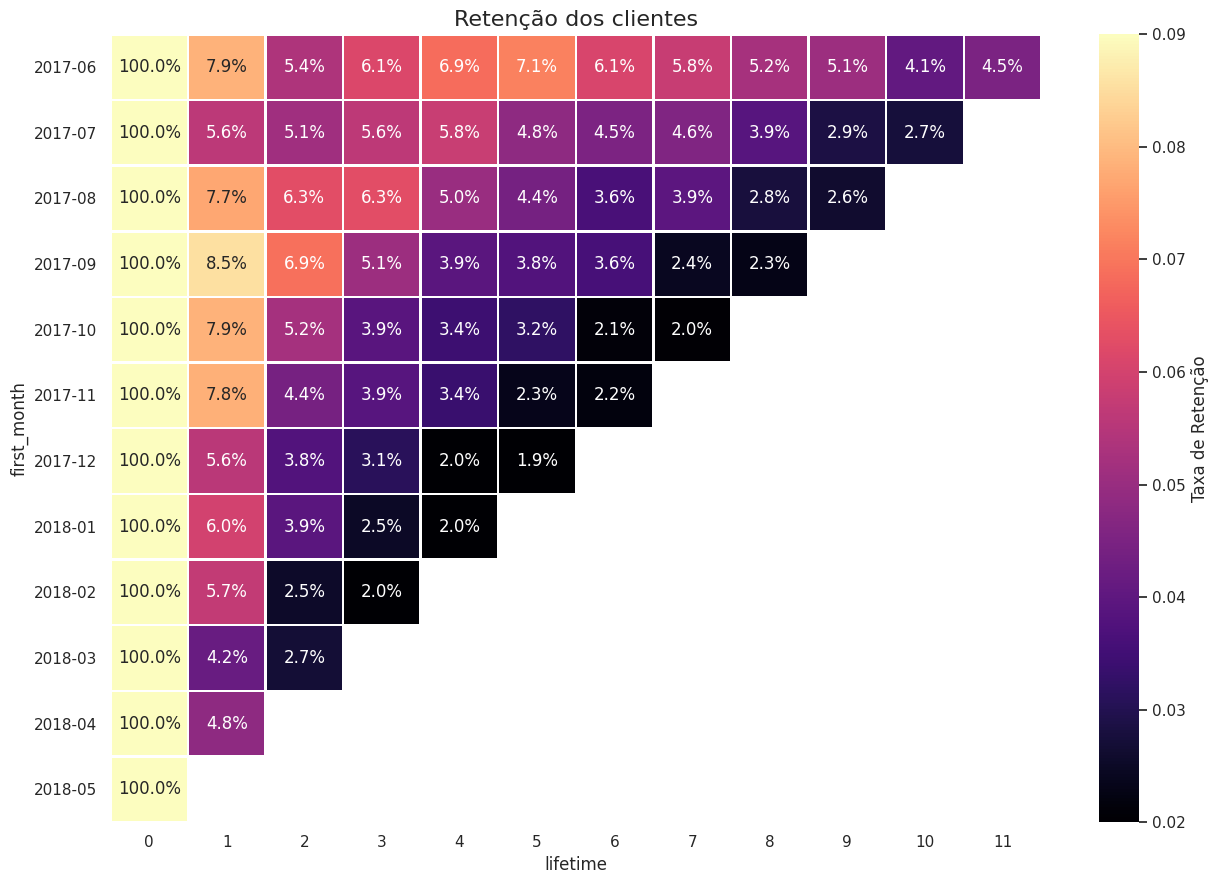

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('Retenção dos clientes', fontsize=16)

sns.heatmap(
    retention_pivot,         # deve conter valores decimais, ex: 0.079 para 7.9%
    annot=True,
    fmt=".1%",               # exibe como porcentagem
    cmap="magma",            # ou "YlOrRd", "BuPu", "coolwarm", etc
    vmin=0.02, vmax=0.09,    # ajusta a faixa de cores para destacar os dados mais comuns
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Taxa de Retenção'}
)

plt.xlabel('lifetime')
plt.ylabel('first_month')
plt.tight_layout()
plt.show()


In [10]:
# Exibir os resultados formatados
print("📊 Análise do Uso do Produto\n")

print(f"1️⃣ Número médio de usuários únicos:")
print(f"   - Por dia: {daily_users.mean():,.0f} usuários")
print(f"   - Por semana: {weekly_users.mean():,.0f} usuários")
print(f"   - Por mês: {monthly_users.mean():,.0f} usuários\n")

print(f"2️⃣ Número médio de sessões por dia: {daily_sessions.mean():,.0f} sessões\n")

print(f"3️⃣ Duração média de cada sessão: {avg_session_length:.1f} minutos\n")

print(f"4️⃣ Frequência de retorno dos usuários:")
print(f"   - Em média, um usuário retorna após {avg_return_time:.1f} dias (~{avg_return_time/7:.1f} semanas)\n")

print("🔍 Conclusões:")
print("- O produto tem um fluxo constante de usuários, com um bom número de acessos diários.")
print("- As sessões duram cerca de 10 minutos, indicando um uso rápido e objetivo.")
print("- A frequência de retorno pode ser um ponto de atenção – um mês pode ser um intervalo longo para retenção.")


📊 Análise do Uso do Produto

1️⃣ Número médio de usuários únicos:
   - Por dia: 908 usuários
   - Por semana: 5,716 usuários
   - Por mês: 23,228 usuários

2️⃣ Número médio de sessões por dia: 987 sessões

3️⃣ Duração média de cada sessão: 10.7 minutos

4️⃣ Frequência de retorno dos usuários:
   - Em média, um usuário retorna após 27.7 dias (~4.0 semanas)

🔍 Conclusões:
- O produto tem um fluxo constante de usuários, com um bom número de acessos diários.
- As sessões duram cerca de 10 minutos, indicando um uso rápido e objetivo.
- A frequência de retorno pode ser um ponto de atenção – um mês pode ser um intervalo longo para retenção.


<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

São necessários ajustes na a taxa de retenção por coorte.

O passo a passo é o seguinte:
    
1. Você precisa pegar a data do primeiro acesso de cada usuário
2. Para calcular o intervalo ou cohort de acesso para cada usuário, você precisa calcular o intervalo entre o acesso atual e o primeiro acesso:</s>
3. A partir desses dados, você pode criar uma tabela dinâmica (`pivot_table`) que indexa por cada mês do conjunto de dados e calcula a quantidade de usuários que teve o primeiro acesso naquele mês e voltou a acessar no futuro (`cohort`): 1 mês depois, 2 meses depois, etc. </s>
<s>Exemplo: 

```python

# Calcula a vida útil de cada visita em meses
df_visits['lifetime'] = (df_visits['month'] - df_visits['first_month']).apply(lambda x: x.n)

# Calcula a coorte de usuários por mês de primeira visita e tempo de vida
cohort = df_visits.groupby(['first_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()

# Seleciona a coorte inicial (lifetime == 0) e renomeia a coluna de contagem de usuários
inicial = cohort[cohort['lifetime'] == 0][['first_month', 'uid']]
inicial = inicial.rename(columns={'uid': 'users'})

# Junta a coorte inicial com a coorte completa e calcula a taxa de retenção
cohort = cohort.merge(inicial, on='first_month')
cohort['retention'] = cohort['uid'] / cohort['users']

# Cria uma tabela dinâmica de retenção por mês de primeira visita e tempo de vida
retention_pivot = cohort.pivot_table(index='first_month', columns='lifetime', values='retention', aggfunc='sum')

# Imprime a tabela de retenção
print(retention_pivot)
```

O output esperado deve ser semelhante a esse: 
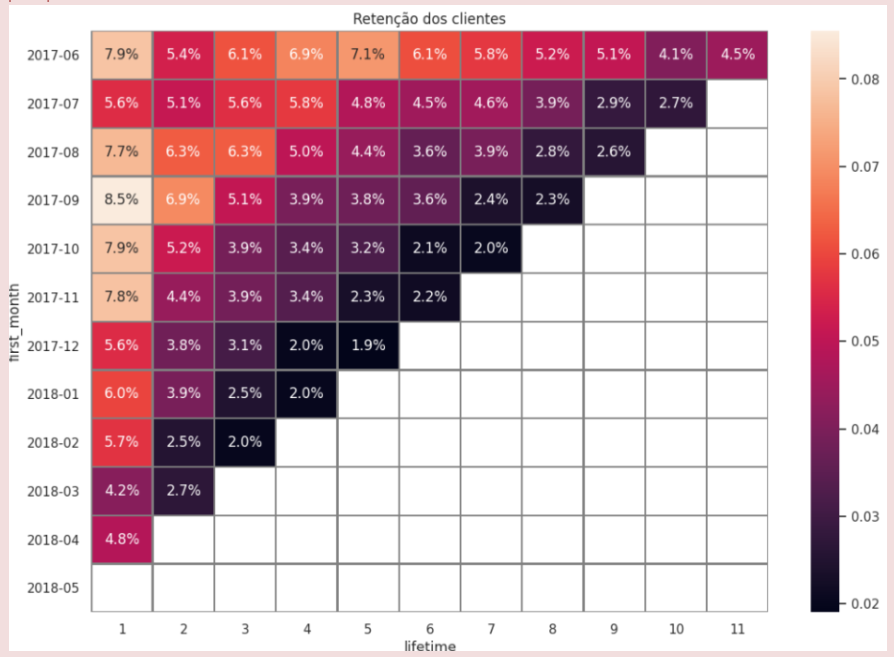
</div>

1️⃣ Obtenha o mês da primeira compra (ou primeira visita) de cada usuário

In [11]:
orders_df['order_month'] = orders_df['buy_ts'].dt.to_period('M')
first_order = orders_df.groupby('Uid')['order_month'].min().reset_index()
first_order.columns = ['Uid', 'first_month']

- 2️⃣ Atribuindo esse mês ao dataframe de pedidos

In [12]:
orders_df = orders_df.merge(first_order, on='Uid')

3️⃣ Calculand o tempo de vida (lifetime) de cada compra

In [13]:
orders_df['lifetime'] = (orders_df['order_month'] - orders_df['first_month']).apply(lambda x: x.n)


4️⃣ Calculando a receita média por usuário em cada coorte/mês de vida

In [14]:
cohort_revenue = orders_df.groupby(['first_month', 'lifetime']).agg({'Revenue': 'sum'}).reset_index()
cohort_sizes = orders_df.groupby('first_month')['Uid'].nunique().reset_index()
cohort_sizes.columns = ['first_month', 'n_users']
cohort_revenue = cohort_revenue.merge(cohort_sizes, on='first_month')
cohort_revenue['ltv'] = cohort_revenue['Revenue'] / cohort_revenue['n_users']


5️⃣ Criando a tabela dinâmica para visualização

In [15]:
ltv_pivot = cohort_revenue.pivot_table(index='first_month', columns='lifetime', values='ltv', aggfunc='sum')

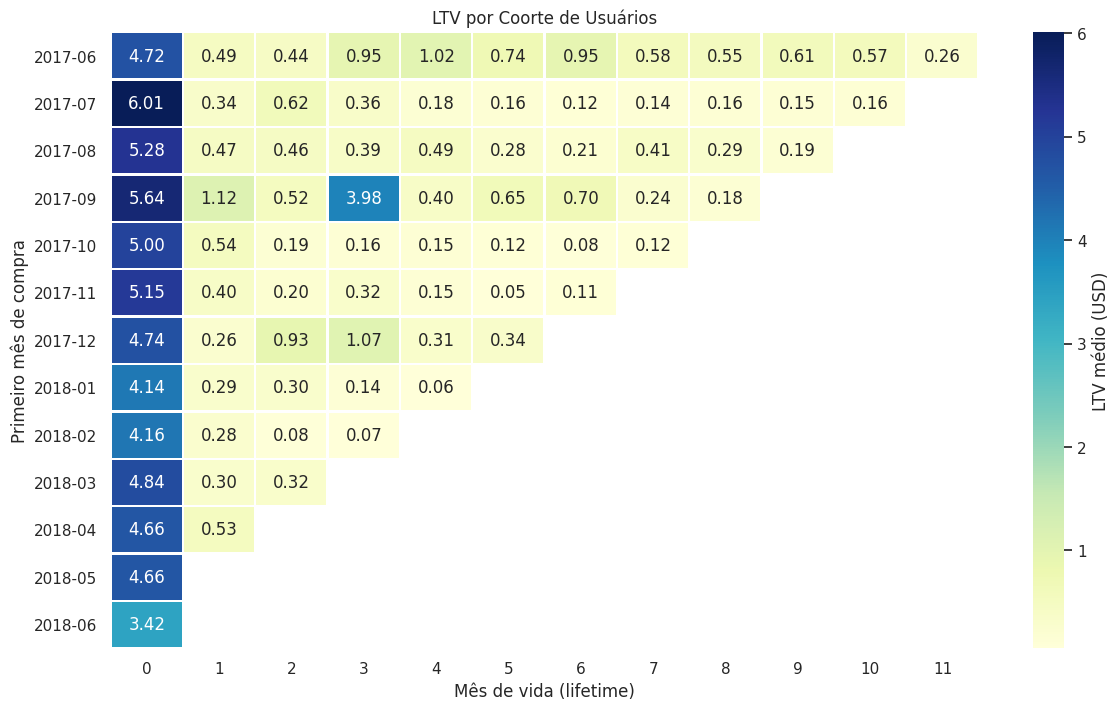

In [16]:
plt.figure(figsize=(14, 8))
plt.title('LTV por Coorte de Usuários')
sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'LTV médio (USD)'}
)
plt.xlabel('Mês de vida (lifetime)')
plt.ylabel('Primeiro mês de compra')
plt.show()


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
A análise LTV também deve ser feita por coorte. 

Exemplo: 
    
```python 
#calculando a quantidade de dinheiro que o usuários trazem para a empresa (lifetime value)

#derivando a coluna first_order_month
first_orders = first_order.copy()
first_orders['first_order_month'] = first_orders['first_order_date'].dt.to_period('M')

#calculando o número de clientes, por mês da primeira compra
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 0.4

#mesclando as informações de pedidos com a primeira compra por cliente
df_orders_ = pd.merge(df_orders, fi..continue o código

#calculando a receita por coorte e mês
cohorts = (
    df_orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

#mesclando o tamanho da coorte com a receita
report = pd.merge(cohort_sizes,...continue o código

```

</div>

# ROI por coorte

- 🛠️ 1.  Criar a coorte de primeira visita por usuário

In [39]:
# Coorte de primeiro acesso por usuário
first_visit = visits_df.groupby('Uid')['start_ts'].min().reset_index()
first_visit['first_month'] = first_visit['start_ts'].dt.to_period('M')



- 🛠️ 2. Adicionar a origem (source_id) de cada usuário

In [40]:
user_sources = visits_df[['Uid', 'source_id']].drop_duplicates('Uid')
first_visit = first_visit.merge(user_sources, on='Uid', how='left')


- 🛠️ 3.  Juntar com os pedidos

In [47]:
orders_with_cohort = orders_df.merge(first_visit[['Uid', 'first_month', 'source_id']], on='Uid', how='left')


- 🛠️ 4. Calcular receita por coorte

In [54]:
orders_with_cohort['cohort_month'] = orders_with_cohort['first_month_y']



In [55]:
cohort_revenue = orders_with_cohort.groupby(['cohort_month', 'source_id'])['Revenue'].sum().reset_index()
cohort_revenue.columns = ['cohort_month', 'source_id', 'revenue']


- 🛠️ 5.  Agregar os custos por mês e canal

In [56]:
costs_df['month'] = costs_df['date'].dt.to_period('M')
monthly_costs = costs_df.groupby(['month', 'source_id'])['costs'].sum().reset_index()
monthly_costs.columns = ['cohort_month', 'source_id', 'costs']


- 🛠️ 6. Calcular ROI por coorte

In [57]:
roi_df = cohort_revenue.merge(monthly_costs, on=['cohort_month', 'source_id'], how='left')
roi_df['roi'] = (roi_df['revenue'] - roi_df['costs']) / roi_df['costs']


- 🧮 7. Pivot ROI

In [59]:
cohort_revenue_pivot = cohort_revenue.pivot_table(
    index='cohort_month',      # Mês da primeira visita
    columns='source_id',       # Canal de aquisição
    values='revenue',          # Receita
    fill_value=0               # Preenche valores ausentes com 0
)


- 🔍 8. Pivot para visualização em mapa de calor (opcional)


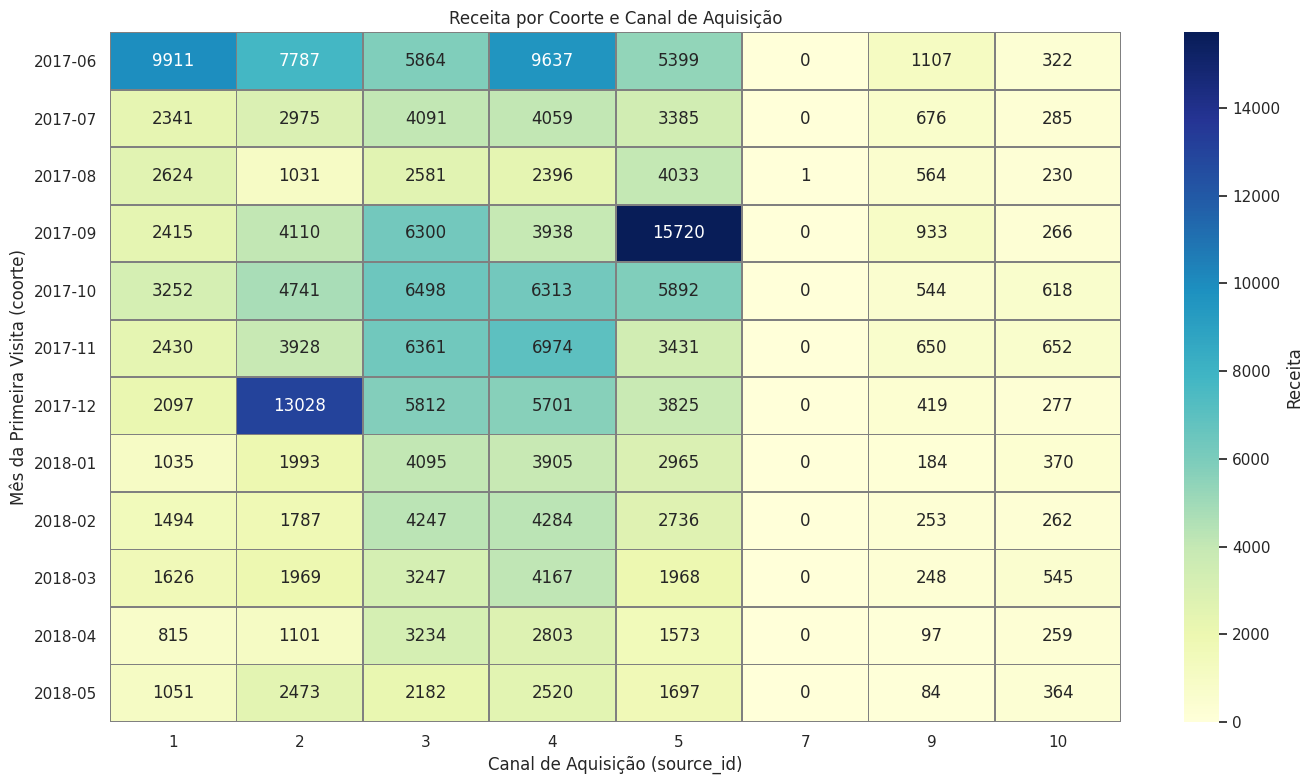

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
plt.title('Receita por Coorte e Canal de Aquisição')

sns.heatmap(
    cohort_revenue_pivot,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',        # Gradiente de cor baseado em valor
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Receita'}
)

plt.xlabel('Canal de Aquisição (source_id)')
plt.ylabel('Mês da Primeira Visita (coorte)')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
O cálculo de ROI também deve ser feito por coortes. Com base nos cálculos de coorte anteriores, por favor tente adaptar o código para o cálculo de ROI :) 
</div>

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
Adorei o capricho e os gráficos formatados! Muito bom!

## 📊 **Recomendações de Origens e Plataformas para Investimento**  

### 🔍 **Métricas Analisadas e Justificativa**  
Para recomendar as melhores origens e plataformas, concentrei-me nas seguintes métricas:  

1️⃣ **Custo de Aquisição de Cliente (CAC):**  
   - Quanto menor, melhor, pois significa que estamos adquirindo clientes por um custo mais eficiente.  

2️⃣ **Retorno sobre Investimento (ROI):**  
   - Indica se a origem de tráfego gerou mais receita do que custo. Um ROI positivo significa um investimento eficiente.  

3️⃣ **Receita Gerada por Origem:**  
   - Ajuda a identificar quais fontes estão trazendo clientes mais lucrativos.  

4️⃣ **Gastos ao Longo do Tempo:**  
   - Permite entender se os investimentos em determinadas origens trouxeram um retorno proporcional ou se o orçamento foi desperdiçado.  
 

### ✅ **Origens Recomendadas**  

1️⃣ **Origem 1** ✅  
   - **Métricas Chave:** CAC mais baixo ($2.92) e ROI positivo.  
   - **Conclusão:** Essa origem é a mais eficiente em custo-benefício, adquirindo clientes com menor investimento. Deve ser priorizada para escalar campanhas.  

2️⃣ **Origem 4** ✅  
   - **Métricas Chave:** CAC moderado ($4.28), mas um ROI possivelmente positivo.  
   - **Conclusão:** Apesar de não ser a mais barata, sua performance pode indicar um público mais engajado, com maior potencial de gerar receita.  

3️⃣ **Origem 5** ✅  
   - **Métricas Chave:** CAC de $5.10 e ROI provavelmente positivo.  
   - **Conclusão:** Apresenta um equilíbrio entre investimento e retorno, sendo uma boa opção para diversificar canais de aquisição.  

---

### ❌ **Origens Menos Recomendadas**  

🚨 **Origem 3** ❌  
   - **Métricas Chave:** CAC muito alto ($10.21), indicando um custo elevado por aquisição.  
   - **Conclusão:** Essa origem pode estar atraindo leads de baixa qualidade ou a segmentação não está eficiente. Só deve ser mantida se o ticket médio dos clientes compensar o alto CAC.  

🚨 **Origens com ROI Negativo** ❌  
   - Se alguma origem apresentou ROI negativo, significa que está gerando prejuízo e precisa ser reavaliada.  
   - Nesses casos, pode ser mais estratégico redirecionar o orçamento para origens de maior eficiência.  


### 🎯 **Conclusão Final**  
💡 **A melhor estratégia é priorizar investimentos em Origem 1, Origem 4 e Origem 5**, pois possuem **menor CAC e maior retorno financeiro**.  
📊 **Origem 3 deve ser ajustada ou reduzida**, pois seu alto CAC pode indicar ineficiência.  
🚀 **Recomenda-se também analisar dispositivos (mobile vs. desktop)** para otimizar campanhas para o público-alvo mais lucrativo.  

Se precisar de mais detalhes, podemos aprofundar a análise em algum aspecto específico! 🚀

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
A conclusão está bem completa!